In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#import dataset
df = pd.read_csv("hr_dataset_professional.csv")

# General overview

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               10000 non-null  int64 
 1   Age                      10000 non-null  int64 
 2   Gender                   10000 non-null  object
 3   Department               10000 non-null  object
 4   JobRole                  10000 non-null  object
 5   EducationLevel           10000 non-null  int64 
 6   MonthlyIncome            10000 non-null  int64 
 7   SalaryBand               10000 non-null  object
 8   YearsAtCompany           10000 non-null  int64 
 9   YearsSinceLastPromotion  10000 non-null  int64 
 10  PerformanceRating        10000 non-null  int64 
 11  OverTime                 10000 non-null  object
 12  MaritalStatus            10000 non-null  object
 13  Attrition                10000 non-null  object
 14  JobSatisfaction          10000 non-null

In [5]:
print(df.describe())

         EmployeeID           Age  EducationLevel  MonthlyIncome  \
count   10000.00000  10000.000000    10000.000000   10000.000000   
mean   105000.50000     40.561200        3.005000    6030.384000   
std      2886.89568     10.876483        1.419992    1940.264282   
min    100001.00000     22.000000        1.000000    2000.000000   
25%    102500.75000     31.000000        2.000000    4663.750000   
50%    105000.50000     41.000000        3.000000    6031.000000   
75%    107500.25000     50.000000        4.000000    7369.250000   
max    110000.00000     59.000000        5.000000   13073.000000   

       YearsAtCompany  YearsSinceLastPromotion  PerformanceRating  \
count    10000.000000              10000.00000       10000.000000   
mean         9.433100                  4.47350           2.801600   
std          5.743485                  2.87453           0.868742   
min          0.000000                  0.00000           1.000000   
25%          4.000000                  2.0

In [6]:
print(df['Attrition'].value_counts())

Attrition
No     8966
Yes    1034
Name: count, dtype: int64


# Department-wise attrition

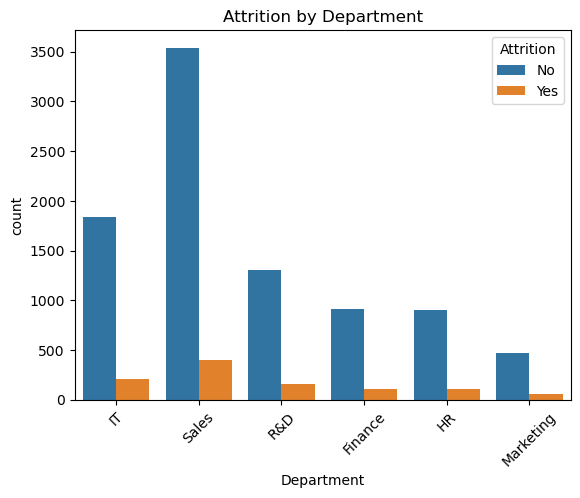

In [7]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()

# Salary band vs attrition

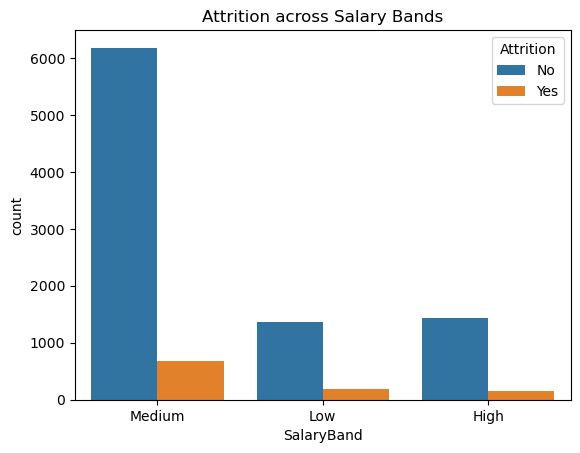

In [8]:
sns.countplot(data=df, x='SalaryBand', hue='Attrition')
plt.title("Attrition across Salary Bands")
plt.show()

# Years since last promotion

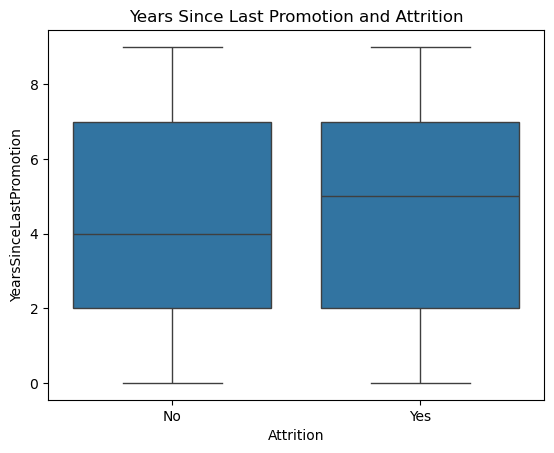

In [9]:
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion')
plt.title("Years Since Last Promotion and Attrition")
plt.show()

# Data Preprocessing

In [10]:
# Make a copy of the original dataframe
df_model = df.copy()

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to all object (text) columns
df_model[df_model.select_dtypes(include='object').columns] = df_model.select_dtypes(include='object').apply(le.fit_transform)

# Separate features and target
X = df_model.drop(columns=['Attrition', 'EmployeeID'])
y = df_model['Attrition']

# Split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Models

In [12]:

# Create a Logistic Regression model with max_iter increased (to ensure convergence)
lr = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model on training data
lr.fit(X_train, y_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [13]:
# Create a Decision Tree model with a maximum depth of 5 (limits tree size to prevent overfitting)
dt = DecisionTreeClassifier(max_depth=5)

# Train the Decision Tree model on training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

# Evaluate the Model

## Get Predictions

In [14]:
# Predict the target values using the trained Logistic Regression model
y_pred_lr = lr.predict(X_test)

# Predict the target values using the trained Decision Tree model
y_pred_dt = dt.predict(X_test)


## Accuracy, Confusion Matrix, and Report

In [16]:
# Calculate and print the accuracy of the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.896


In [17]:
# Print the confusion matrix for the Logistic Regression model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
 [[2688    0]
 [ 312    0]]


In [18]:
# Print the classification report for the Logistic Regression model
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2688
           1       0.00      0.00      0.00       312

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.80      0.90      0.85      3000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
